# 02. EDA, Exploratory Data Analysis

* EDA(탐색적 데이터 분석)이란, 요약 및 시각화 등을 통해 데이터를 이해하는 과정을 말한다.

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# rc('font', family='AppleGothic') # Mac 
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [6]:
data_path = "data/naver_review_preprocessing.csv"
data = pd.read_csv(data_path, parse_dates=["date"], encoding="CP949")
data.head(5)

,reviewer,review,date,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요,2024-06-07,금요일
1,쥴리08,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,2024-05-23,목요일
2,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024-05-19,일요일
3,DEAN KIL,비싸지만 좋은곳,2024-05-04,토요일
4,이진욱쨩,항상 친절하시고 음식도맛있네요,2024-04-21,일요일


## 1. 재방문에 대한 분석

- 의견이 크게 반전으로 달라지는 의견은 없었다. 
- 재방문을 한 사람이 많이 않아서 일반화 하기에는 어려움이 있다.

In [7]:
revisitor_data = data["reviewer"].value_counts()
revisitor = revisitor_data[revisitor_data > 1].index
revisited_data = data.loc[data["reviewer"].isin(revisitor),:].sort_values(by=["reviewer"])
print(revisited_data.shape)
revisited_data

(14, 4)


,reviewer,review,date,weekday
20,ERANGMAM,애기가 스테이크 너무 잘먹었어요 언제나 더파크뷰는 흠이없어요 친절함과 식사의 품질은...,2024-01-03,수요일
192,ERANGMAM,특별한날 방문하기 너무 좋아요 음식도 항상 신선하고 맛있고 무엇보다 직원들 너무 친...,2022-02-05,토요일
302,noeulll,디너만 자주 가다가 브런치 오랜만에 갓는데 예전만 못하지만 괜찮네요,2020-06-17,수요일
303,noeulll,정말 완벽한 서비스입니다 근데 맛이 예전만 못하네요 그래도 만족합니다,2020-05-27,수요일
19,나라나57,너무 맛있고 분위기 좋습니다,2024-01-05,금요일
40,나라나57,다음에 또갈거에요,2023-10-28,토요일
157,오예3337,넘 맛있어요 기념일에 꼭 강추,2022-06-03,금요일
158,오예3337,서비스가 너무 좋아요 굿굿,2022-06-03,금요일
4,이진욱쨩,항상 친절하시고 음식도맛있네요,2024-04-21,일요일
30,이진욱쨩,너무친절 음식도 너무맛있어욤 역시 신라호텔 체고,2023-11-19,일요일


## 2. 시기별 리뷰 분석

* 2022년 이후부터 활발한 것으로 나타남.

In [8]:
def draw_barplot_by_period(data, period, title, rot=90):
    fig, ax = plt.subplots(figsize=(10, 3))
    palette = {"2019": "#9656a2", "2020": "#369acc", "2021": "#95cf92", "2022": "#f8e16f", "2023": "#f4895f", "2024": "#de324c"}

    # 연도별 데이터 분리
    period_data = data.groupby(data["date"].dt.to_period("Y"))
    xticks = []
    xticklabels = []
    for year, subdata in period_data:
        # 기간별 데이터 프레임
        group = subdata.groupby(subdata["date"].dt.to_period(period)).size()
        # bar graph 그리기
        ax.bar(group.index.astype("int64"), group.values, color=palette[str(year)], label=str(year))
        # x축 값과 라벨 저장
        xticks.extend(group.index.astype("int64"))
        xticklabels.extend(group.index)
        
    # 그래프 꾸미기
    ax.set_title(title)
    ax.set_xticks(xticks, labels=xticklabels, rotation=rot)
    ax.legend(loc="best")

    plt.show()

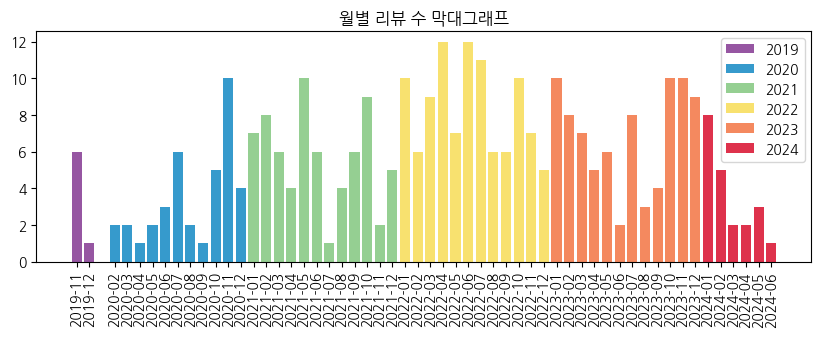

In [183]:
# 월별 리뷰 수 파악하기
draw_barplot_by_period(data, "M", title="월별 리뷰 수 막대그래프")

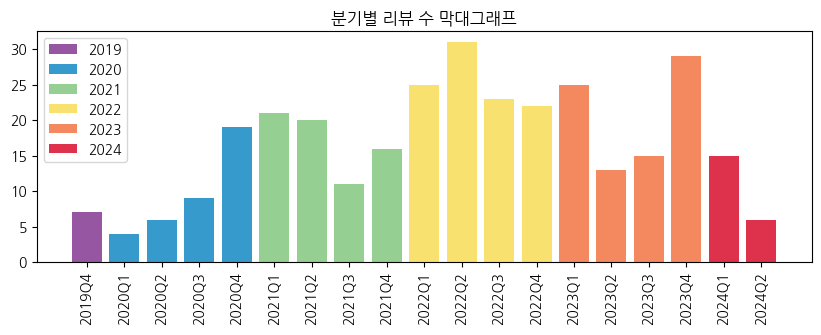

In [184]:
# 분기별 리뷰 수 파악하기
draw_barplot_by_period(data, "Q", title="분기별 리뷰 수 막대그래프")

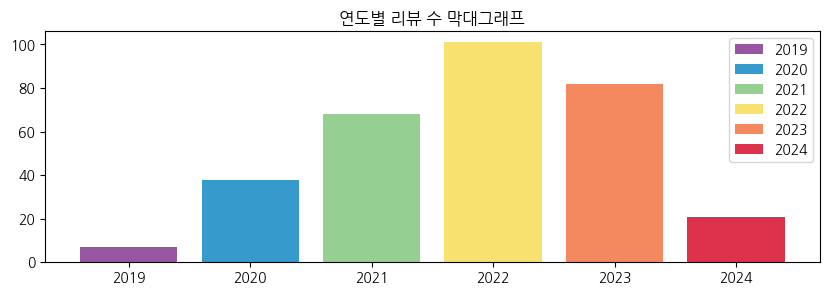

In [185]:
# 연도별 리뷰 수 파악하기
draw_barplot_by_period(data, "Y", title="연도별 리뷰 수 막대그래프", rot=0)

## 3. 요일별 리뷰 분석

* 예상한대로 금, 토, 일에 가장 활발이 방문이 이루어진 것으로 보인다.

In [186]:
weekday_data = data["weekday"].value_counts()
weekday_data

weekday
토요일    80
일요일    75
금요일    46
목요일    38
수요일    29
월요일    29
화요일    20
Name: count, dtype: int64

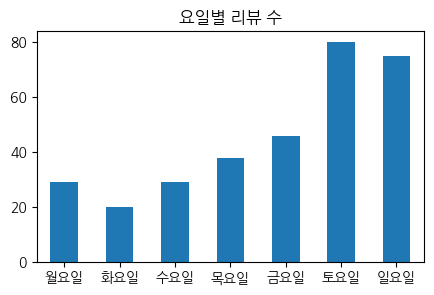

In [187]:
fig, ax = plt.subplots(figsize=(5, 3))
weekdays = ["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]
weekday_data[weekdays].plot(ax=ax, kind="bar")

# title 설정
ax.set(title="요일별 리뷰 수", xlabel="")
# x축 요소 라벨 설정
for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

plt.show()

## 2. 워드 클라우드

In [65]:
from wordcloud import WordCloud
from collections import Counter

def search_review(data, keyword):
    idx_list = []
    for idx, nouns in enumerate(data["N"]):
        if str(nouns) == "nan":
            continue
        if keyword in nouns.split():
            idx_list.append(idx)

    results = data.loc[idx_list,"review"]

    return results

class WordCloudTool:
    def __init__(self, data):
        self.data = data
        self.wc = WordCloud(
            font_path='./data/NanumSquareNeo-cBd.ttf', 
            background_color='white',
            width=1920,
            height=1080
        )
        self.word_dict = {}
        self.min_cnt = 5
        self.max_cnt = np.inf

    def make_cloud(self, column):
        words = []
        for word in self.data[column]:
            if str(word) == "nan":
                continue
            words += str(word).split()
        
        counter = Counter(words)
        for key, value in counter.items():
            if value > self.min_cnt and value < self.max_cnt:
                self.word_dict[key] = value
        cloud = self.wc.generate_from_frequencies(self.word_dict)
        
        return cloud

    def draw(self, column, title):
        cloud = self.make_cloud(column)

        fig, ax = plt.subplots(figsize=(8,5))
        ax.imshow(cloud, interpolation="bilinear")
        ax.set_title(title, fontweight="bold")


In [4]:
data_path = "data/naver_review_tokenizing.csv"
tk_data = pd.read_csv(data_path, parse_dates=["date"], encoding="CP949")
tk_data.head(5)

,reviewer,date,weekday,review,N,V
0,shooooooo,2024-06-07,금요일,종류도 알차게 많고 다 맛있어요,종류,알차다 많다 맛있다
1,쥴리08,2024-05-23,목요일,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,커피 브런치 크림 파스타 파스타 신라 커피,먹다 불다 나오다 맛있다
2,illiiilillil,2024-05-19,일요일,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,직원 친절 음식 맛 대한민국 호텔 부페 넘버원 뭐 조금 입장 융통 거 일류 구색 거,이다 좋다 아쉽다 약하다
3,DEAN KIL,2024-05-04,토요일,비싸지만 좋은곳,곳,비싸다 좋다
4,이진욱쨩,2024-04-21,일요일,항상 친절하시고 음식도맛있네요,친절 음식,맛있다


### 1) 전체

In [55]:
wordcloud = WordCloudTool(tk_data)

In [62]:
search_review(tk_data, keyword="만")

7                  네번째 방문만에 창가자리에서 먹게 되어서 기쁨 그리고 카페라떼 맛집
56     음식이 전체적으로 신선하고 너무너무 맛이좋았습니다 근데 디저트코너에 있는 오이라임주...
71                                  생일기념으로 왔어요 기념일때 올만해요
72                         비싸지만 한번은 가볼만 해요 역시 대한민국 1등 호텔
88                                           적당히 먹을만 합니다
146    종류 굉장히 다양하고 이름이 낯선 음식들도 많아요 한번쯤 방문할만 하지만 가격대비는...
162    맛있어요 한식 레스토랑이 따로 있어서 그런지 한식라인은 아예 없어서 좀 아쉬웠지만 ...
176                      양고기랑 대게가 특히 맛있어요 한 번쯤 가볼만한 곳입니다
183                                           그냥 먹을만 했어요
234    오랜만에 기분전환도 할겸 멋진곳에 다녀왔어요 서비스도 좋고 여러가지 음식도 다 맛 ...
257    맛있음 다만 여기가 몇대뷔페라고 불릴만한가는 애매하다 고기는 확실히 좋음 비슷한급에...
295    역시 국내최고의 뷔페네요 직원들도 엄청 친절하시고 접시도 빨리빨리 치워주시고 무엇보...
Name: review, dtype: object

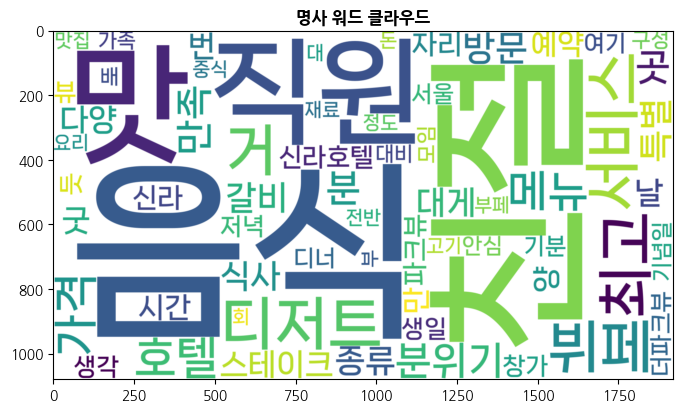

In [66]:
wordcloud.draw(column="N", title="명사 워드 클라우드")

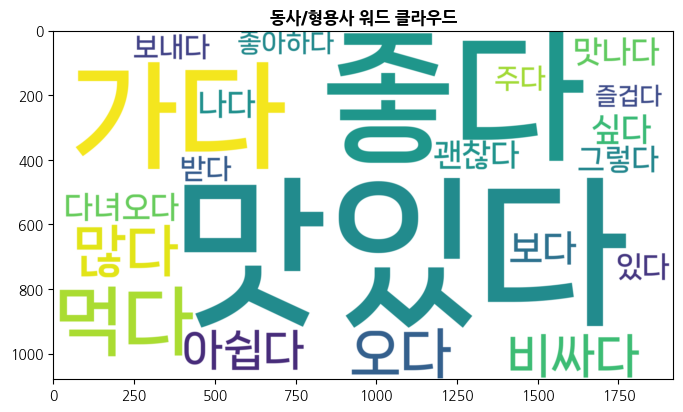

In [67]:
wordcloud.draw(column="V", title="동사/형용사 워드 클라우드")

### 2) 연도별

In [68]:
by_year = tk_data[tk_data["date"].dt.year==2022]
wordcloud = WordCloudTool(by_year)

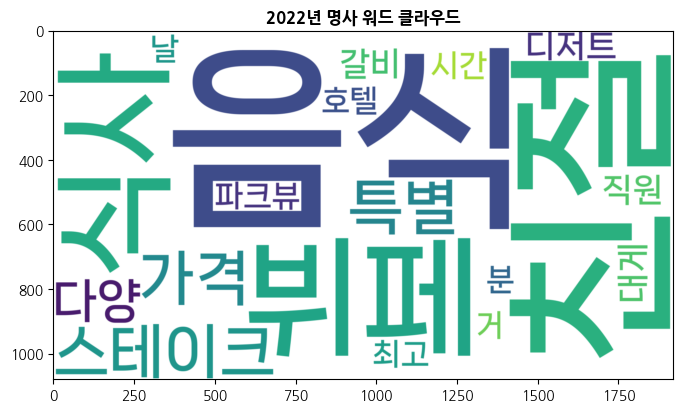

In [69]:
wordcloud.draw(column="N", title="2022년 명사 워드 클라우드")

In [41]:
search_review(tk_data, "신경")

137    친절하고 세심하게 신경써주셔 즐거운 식사시간였습니다
Name: review, dtype: object